In [2]:
import yaml
import os
import datetime
import numpy
import csv
import pickle
from matplotlib import pyplot as plt 
import statistics 

In [11]:
filenames = os.listdir('ipl')
ourDataList=[]
fileCount=0
for i in filenames: 
    if i[-5:] == '.yaml':
        filedataofThismatch =yaml.safe_load(open('ipl/'+i,'r'))
        fileCount+=1
        print(fileCount,i)
        if filedataofThismatch['info']['outcome'].get('winner') is not None:
            
            if isinstance(filedataofThismatch['info']['dates'][0],str):
                thisMatchDate=datetime.datetime.strptime(filedataofThismatch['info']['dates'][0], '%Y-%m-%d')
            else:
                thisMatchDate=datetime.datetime.strptime(\
                                    datetime.datetime.strftime(filedataofThismatch['info']['dates'][0], '%Y-%m-%d'),\
                                    '%Y-%m-%d')
            if thisMatchDate.year>=2008 and thisMatchDate.year<=2012:
                ourdata ={}
                ballindex = 120
                totalrunscount = 0
                wicketsremaining = 10
                deliveryList=filedataofThismatch['innings'][0]['1st innings']['deliveries']
                for j in range(len(deliveryList)):
                    ballscount = list(deliveryList[j].keys())[0]
                    totalrunsperball=deliveryList[j][ballscount]['runs']['total']
                    totalrunscount=totalrunscount+totalrunsperball
                    if 'wicket' in list(deliveryList[j][ballscount].keys()):
                            wicketsremaining=wicketsremaining-1

                    validBall=True
                    if 'extras' in list(deliveryList[j][ballscount].keys()):
                        if 'wides' in (deliveryList[j][ballscount]['extras'].keys()) or \
                            'noballs' in (deliveryList[j][ballscount]['extras'].keys()):
                            validBall=False

                    if validBall:    
                        ballindex = ballindex-1
                        ourdata[ballindex]={}
                        ourdata[ballindex]['totalrunscount']=totalrunscount
                        ourdata[ballindex]['wicketsremaining']=wicketsremaining
                        
                if wicketsremaining==0 or (ballindex<5 and ballindex>0):
                    for k in range(ballindex-1,-1,-1):
                        ourdata[k]={}
                        ourdata[k]['totalrunscount']=totalrunscount
                        ourdata[k]['wicketsremaining']=wicketsremaining
                    
                listElement={}
                listElement['ourData']=ourdata
                listElement['matchDate']=thisMatchDate
                listElement['matchId']=i
                
                winnerofmatch=filedataofThismatch['info']['outcome']['winner']
                teambattingfirst=filedataofThismatch['innings'][0]['1st innings']['team']
                if winnerofmatch == teambattingfirst:
                    listElement['winLoss']='win'
                else:
                    listElement['winLoss']='loss'

                ourDataList.append(listElement)
                print(len(ourDataList),winnerofmatch)

def swapMatchData(a,b):
    temp=ourDataList[a]
    ourDataList[a]=ourDataList[b]
    ourDataList[b]=temp

for j in range(1,len(ourDataList)-1):
    for i in range(0,len(ourDataList)-j):
        if ourDataList[i]['matchDate']>ourDataList[i+1]['matchDate']:
            swapMatchData(i,i+1)

1 1082591.yaml
2 1082592.yaml
3 1082593.yaml
4 1082594.yaml
5 1082595.yaml
6 1082596.yaml
7 1082597.yaml
8 1082598.yaml
9 1082599.yaml
10 1082600.yaml
11 1082601.yaml
12 1082602.yaml
13 1082603.yaml
14 1082604.yaml
15 1082605.yaml
16 1082606.yaml
17 1082607.yaml
18 1082608.yaml
19 1082609.yaml
20 1082610.yaml
21 1082611.yaml
22 1082612.yaml
23 1082613.yaml
24 1082614.yaml
25 1082615.yaml
26 1082616.yaml
27 1082617.yaml
28 1082618.yaml
29 1082620.yaml
30 1082621.yaml
31 1082622.yaml
32 1082623.yaml
33 1082624.yaml
34 1082625.yaml
35 1082626.yaml
36 1082627.yaml
37 1082628.yaml
38 1082629.yaml
39 1082630.yaml
40 1082631.yaml
41 1082632.yaml
42 1082633.yaml
43 1082634.yaml
44 1082635.yaml
45 1082636.yaml
46 1082637.yaml
47 1082638.yaml
48 1082639.yaml
49 1082640.yaml
50 1082641.yaml
51 1082642.yaml
52 1082643.yaml
53 1082644.yaml
54 1082645.yaml
55 1082646.yaml
56 1082647.yaml
57 1082648.yaml
58 1082649.yaml
59 1082650.yaml
60 1136561.yaml
61 1136562.yaml
62 1136563.yaml
63 1136564.yaml
6

354 392239.yaml
114 Deccan Chargers
355 419106.yaml
115 Kolkata Knight Riders
356 419107.yaml
116 Mumbai Indians
357 419108.yaml
117 Delhi Daredevils
358 419109.yaml
118 Kolkata Knight Riders
359 419110.yaml
119 Deccan Chargers
360 419111.yaml
120 Delhi Daredevils
361 419112.yaml
121 Royal Challengers Bangalore
362 419113.yaml
122 Chennai Super Kings
363 419114.yaml
123 Mumbai Indians
364 419115.yaml
124 Royal Challengers Bangalore
365 419116.yaml
125 Chennai Super Kings
366 419117.yaml
126 Deccan Chargers
367 419118.yaml
127 Rajasthan Royals
368 419119.yaml
128 Royal Challengers Bangalore
369 419120.yaml
129 Deccan Chargers
370 419121.yaml
371 419122.yaml
130 Mumbai Indians
372 419123.yaml
131 Royal Challengers Bangalore
373 419124.yaml
132 Rajasthan Royals
374 419125.yaml
133 Mumbai Indians
375 419126.yaml
134 Rajasthan Royals
376 419127.yaml
135 Kolkata Knight Riders
377 419128.yaml
136 Delhi Daredevils
378 419129.yaml
137 Rajasthan Royals
379 419130.yaml
138 Mumbai Indians
380 4191

570 598006.yaml
571 598007.yaml
572 598008.yaml
573 598009.yaml
574 598010.yaml
575 598011.yaml
576 598012.yaml
577 598013.yaml
578 598014.yaml
579 598015.yaml
580 598016.yaml
581 598017.yaml
582 598018.yaml
583 598019.yaml
584 598020.yaml
585 598021.yaml
586 598022.yaml
587 598023.yaml
588 598024.yaml
589 598025.yaml
590 598026.yaml
591 598027.yaml
592 598028.yaml
593 598029.yaml
594 598030.yaml
595 598031.yaml
596 598032.yaml
597 598033.yaml
598 598034.yaml
599 598035.yaml
600 598036.yaml
601 598037.yaml
602 598038.yaml
603 598039.yaml
604 598040.yaml
605 598041.yaml
606 598042.yaml
607 598043.yaml
608 598044.yaml
609 598045.yaml
610 598046.yaml
611 598047.yaml
612 598048.yaml
613 598049.yaml
614 598050.yaml
615 598051.yaml
616 598052.yaml
617 598053.yaml
618 598054.yaml
619 598055.yaml
620 598056.yaml
621 598057.yaml
622 598058.yaml
623 598059.yaml
624 598060.yaml
625 598061.yaml
626 598062.yaml
627 598063.yaml
628 598064.yaml
629 598065.yaml
630 598066.yaml
631 598067.yaml
632 5980

In [21]:
with open('dataofalliplmatches.pkl', 'wb') as file: 
    pickle.dump(filedataofThismatch, file)

In [12]:
with open('dataofallmatchesinfirstfiveyears.pkl', 'wb') as file: 
    pickle.dump(ourDataList, file)

In [40]:
winCount, lossCount=0,0
for i in range(len(ourDataList)):
    if ourDataList[i]['winLoss']=='win':
        winCount=winCount+1
    else:
        lossCount=lossCount+1
print(winCount,lossCount)

145 174


In [17]:
with open('SafeScoreBatsmen1stInnings.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    SafeScore = unpickler.load() 
    file.close()
with open('safeWicketBatsmen1stInnings.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    safeWicket = unpickler.load() 
    file.close()

In [18]:
statecountperball={}
for p in range(119,-1,-1):
    statecountperball[p]={}
    statecountperball[p]['a1b1']={}
    statecountperball[p]['a1b1']['win']=0
    statecountperball[p]['a1b1']['loss']=0
    statecountperball[p]['a1b2']={}
    statecountperball[p]['a1b2']['win']=0
    statecountperball[p]['a1b2']['loss']=0
    statecountperball[p]['a2b1']={}
    statecountperball[p]['a2b1']['win']=0
    statecountperball[p]['a2b1']['loss']=0
    statecountperball[p]['a2b2']={}
    statecountperball[p]['a2b2']['win']=0
    statecountperball[p]['a2b2']['loss']=0

for p in range(119,-1,-1):
    for i in range(len(ourDataList)):
        key1=list(ourDataList[i].keys())[0]
        key2=list(ourDataList[i][key1].keys())
        if len(key2)==120:
            
            state=''
            if ourDataList[i][key1][p]['totalrunscount']>=SafeScore[p]:
                state+='a1'
            else:
                state+='a2'
            if ourDataList[i][key1][p]['wicketsremaining']>=safeWicket[p]:
                state+='b1'
            else:
                state+='b2'
                
        if ourDataList[i]['winLoss']=='win':
            statecountperball[p][state]['win']+=1
        else:
            statecountperball[p][state]['loss']+=1
            
            
    print(p,statecountperball[p])

119 {'a1b1': {'win': 140, 'loss': 167}, 'a1b2': {'win': 5, 'loss': 7}, 'a2b1': {'win': 0, 'loss': 0}, 'a2b2': {'win': 0, 'loss': 0}}
118 {'a1b1': {'win': 99, 'loss': 112}, 'a1b2': {'win': 2, 'loss': 5}, 'a2b1': {'win': 39, 'loss': 49}, 'a2b2': {'win': 5, 'loss': 8}}
117 {'a1b1': {'win': 74, 'loss': 95}, 'a1b2': {'win': 1, 'loss': 8}, 'a2b1': {'win': 62, 'loss': 61}, 'a2b2': {'win': 8, 'loss': 10}}
116 {'a1b1': {'win': 64, 'loss': 77}, 'a1b2': {'win': 2, 'loss': 7}, 'a2b1': {'win': 68, 'loss': 78}, 'a2b2': {'win': 11, 'loss': 12}}
115 {'a1b1': {'win': 68, 'loss': 81}, 'a1b2': {'win': 2, 'loss': 9}, 'a2b1': {'win': 61, 'loss': 69}, 'a2b2': {'win': 14, 'loss': 15}}
114 {'a1b1': {'win': 60, 'loss': 77}, 'a1b2': {'win': 7, 'loss': 7}, 'a2b1': {'win': 63, 'loss': 69}, 'a2b2': {'win': 15, 'loss': 21}}
113 {'a1b1': {'win': 46, 'loss': 47}, 'a1b2': {'win': 2, 'loss': 4}, 'a2b1': {'win': 74, 'loss': 95}, 'a2b2': {'win': 23, 'loss': 28}}
112 {'a1b1': {'win': 55, 'loss': 61}, 'a1b2': {'win': 4, 'l

49 {'a1b1': {'win': 32, 'loss': 17}, 'a1b2': {'win': 13, 'loss': 7}, 'a2b1': {'win': 48, 'loss': 54}, 'a2b2': {'win': 52, 'loss': 96}}
48 {'a1b1': {'win': 33, 'loss': 15}, 'a1b2': {'win': 12, 'loss': 8}, 'a2b1': {'win': 43, 'loss': 53}, 'a2b2': {'win': 57, 'loss': 98}}
47 {'a1b1': {'win': 34, 'loss': 14}, 'a1b2': {'win': 12, 'loss': 8}, 'a2b1': {'win': 42, 'loss': 53}, 'a2b2': {'win': 57, 'loss': 99}}
46 {'a1b1': {'win': 33, 'loss': 17}, 'a1b2': {'win': 13, 'loss': 8}, 'a2b1': {'win': 43, 'loss': 47}, 'a2b2': {'win': 56, 'loss': 102}}
45 {'a1b1': {'win': 31, 'loss': 15}, 'a1b2': {'win': 12, 'loss': 7}, 'a2b1': {'win': 44, 'loss': 48}, 'a2b2': {'win': 58, 'loss': 104}}
44 {'a1b1': {'win': 31, 'loss': 14}, 'a1b2': {'win': 14, 'loss': 8}, 'a2b1': {'win': 43, 'loss': 46}, 'a2b2': {'win': 57, 'loss': 106}}
43 {'a1b1': {'win': 31, 'loss': 15}, 'a1b2': {'win': 14, 'loss': 4}, 'a2b1': {'win': 42, 'loss': 43}, 'a2b2': {'win': 58, 'loss': 112}}
42 {'a1b1': {'win': 31, 'loss': 15}, 'a1b2': {'win'

In [19]:
winprobabstate={}
for p in range(119,-1,-1):
    winprobabstate[p]={}
    for state in ['a1b1','a1b2','a2b1','a2b2']:
        winCount,lossCount=statecountperball[p][state]['win'],statecountperball[p][state]['loss']
        if (winCount+lossCount)>0:
            winprobabstate[p][state]=round(winCount/(winCount+lossCount),2)
        else:
            winprobabstate[p][state]=numpy.Inf
            
for p in range(119,-1,-1):
    print(p,winprobabstate[p])

119 {'a1b1': 0.46, 'a1b2': 0.42, 'a2b1': inf, 'a2b2': inf}
118 {'a1b1': 0.47, 'a1b2': 0.29, 'a2b1': 0.44, 'a2b2': 0.38}
117 {'a1b1': 0.44, 'a1b2': 0.11, 'a2b1': 0.5, 'a2b2': 0.44}
116 {'a1b1': 0.45, 'a1b2': 0.22, 'a2b1': 0.47, 'a2b2': 0.48}
115 {'a1b1': 0.46, 'a1b2': 0.18, 'a2b1': 0.47, 'a2b2': 0.48}
114 {'a1b1': 0.44, 'a1b2': 0.5, 'a2b1': 0.48, 'a2b2': 0.42}
113 {'a1b1': 0.49, 'a1b2': 0.33, 'a2b1': 0.44, 'a2b2': 0.45}
112 {'a1b1': 0.47, 'a1b2': 0.36, 'a2b1': 0.46, 'a2b2': 0.43}
111 {'a1b1': 0.47, 'a1b2': 0.55, 'a2b1': 0.47, 'a2b2': 0.39}
110 {'a1b1': 0.46, 'a1b2': 0.5, 'a2b1': 0.48, 'a2b2': 0.4}
109 {'a1b1': 0.52, 'a1b2': 0.44, 'a2b1': 0.44, 'a2b2': 0.39}
108 {'a1b1': 0.48, 'a1b2': 0.43, 'a2b1': 0.47, 'a2b2': 0.42}
107 {'a1b1': 0.45, 'a1b2': 0.41, 'a2b1': 0.49, 'a2b2': 0.42}
106 {'a1b1': 0.49, 'a1b2': 0.43, 'a2b1': 0.49, 'a2b2': 0.4}
105 {'a1b1': 0.52, 'a1b2': 0.4, 'a2b1': 0.49, 'a2b2': 0.39}
104 {'a1b1': 0.47, 'a1b2': 0.38, 'a2b1': 0.54, 'a2b2': 0.39}
103 {'a1b1': 0.5, 'a1b2': 0.43, 

In [54]:
a1b1,a1b2,a2b1,a2b2,P=[],[],[],[],[]
for p in range(119,-1,-1):
    a1b1.append(winprobabstate[p]['a1b1'])
    a1b2.append(winprobabstate[p]['a1b2'])
    a2b1.append(winprobabstate[p]['a2b1'])
    a2b2.append(winprobabstate[p]['a2b2'])
    P.append(120-p)

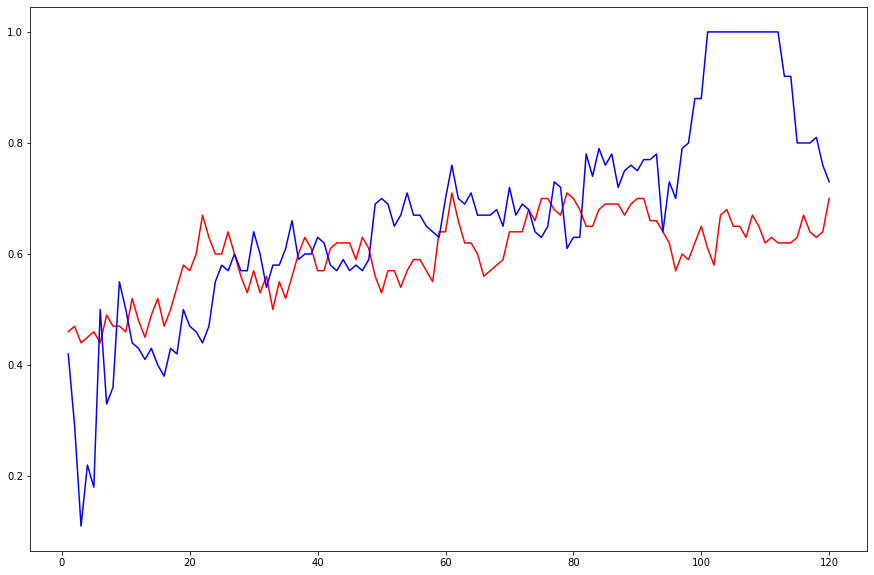

In [65]:
plt.figure(figsize=(15, 10)) 

plt.plot(P,a1b1,color='red')
plt.plot(P,a1b2,color='blue')
plt.show() 

In [64]:
statistics.mode([2,1,1,2,2,3,3,3,1])

2

In [20]:
with open('ab1stInnings.pkl', 'wb') as file: 
    pickle.dump(winprobabstate, file) 

In [5]:
# allMatchesBallByBall


filenames = os.listdir('C:/Users/Arghyadip/Desktop/pythonCodes_sportsWizzLeague/ipl')
ourDataList=[]
fileCount=0
for f in filenames: 
    if f[-5:] == '.yaml':
        filedataofThismatch =yaml.safe_load(open('C:/Users/Arghyadip/Desktop/pythonCodes_sportsWizzLeague/ipl/'+f,'r'))
        
        addThisMatchInfo=True
        
        thisMatchInfo={}
        thisMatchInfo['matchId']=f
        thisMatchInfo['teams']=[]
        
        if isinstance(filedataofThismatch['info']['dates'][0],str):
            thisMatchDate=datetime.datetime.strptime(filedataofThismatch['info']['dates'][0], '%Y-%m-%d')
        else:
            thisMatchDate=datetime.datetime.strptime(\
                                datetime.datetime.strftime(filedataofThismatch['info']['dates'][0], '%Y-%m-%d'),\
                                '%Y-%m-%d')
        thisMatchInfo['matchDate']=thisMatchDate
        
        if filedataofThismatch['info']['outcome'].get('winner') is not None:
            thisMatchInfo['winner']=filedataofThismatch['info']['outcome']['winner']
        elif filedataofThismatch['info']['outcome'].get('eliminator') is not None:
            thisMatchInfo['winner']=filedataofThismatch['info']['outcome']['eliminator']
            
        
        thisMatchInfo['innings']=[]
        for i in range(len(filedataofThismatch['innings'])):
            if i>1:
                continue
            inng='1st innings' if i==0 else '2nd innings'
            
            thisMatchInfo['teams'].append(filedataofThismatch['innings'][i][inng]['team'])
            
            deliveryList=filedataofThismatch['innings'][i][inng]['deliveries']
            thisMatchInfo['innings'].append(deliveryList)
            wicketsremaining = 10
            for j in range(len(deliveryList)):
                ballscount = list(deliveryList[j].keys())[0]
                if 'wicket' in list(deliveryList[j][ballscount].keys()):
                    wicketsremaining=wicketsremaining-1
                    
            if i==0 and wicketsremaining>0 and int(str(list(thisMatchInfo['innings'][-1][-1].keys())[0]).split('.')[0])<18:
                addThisMatchInfo=False
        
        if addThisMatchInfo:
            ourDataList.append(thisMatchInfo)
            fileCount+=1
            print(fileCount)
            
        print(f)

def swapMatchData(a,b):
    temp=ourDataList[a]
    ourDataList[a]=ourDataList[b]
    ourDataList[b]=temp

for j in range(1,len(ourDataList)-1):
    for i in range(0,len(ourDataList)-j):
        if ourDataList[i]['matchDate']>ourDataList[i+1]['matchDate']:
            swapMatchData(i,i+1)

print(len(ourDataList))

with open('allMatchesBallByBall.pkl', 'wb') as file: 
    pickle.dump(ourDataList, file)

1
1082591.yaml
2
1082592.yaml
3
1082593.yaml
4
1082594.yaml
5
1082595.yaml
6
1082596.yaml
7
1082597.yaml
8
1082598.yaml
9
1082599.yaml
10
1082600.yaml
11
1082601.yaml
12
1082602.yaml
13
1082603.yaml
14
1082604.yaml
15
1082605.yaml
16
1082606.yaml
17
1082607.yaml
18
1082608.yaml
19
1082609.yaml
20
1082610.yaml
21
1082611.yaml
22
1082612.yaml
23
1082613.yaml
24
1082614.yaml
25
1082615.yaml
26
1082616.yaml
27
1082617.yaml
28
1082618.yaml
29
1082620.yaml
30
1082621.yaml
31
1082622.yaml
32
1082623.yaml
33
1082624.yaml
34
1082625.yaml
35
1082626.yaml
36
1082627.yaml
37
1082628.yaml
38
1082629.yaml
39
1082630.yaml
40
1082631.yaml
41
1082632.yaml
42
1082633.yaml
43
1082634.yaml
44
1082635.yaml
45
1082636.yaml
46
1082637.yaml
47
1082638.yaml
48
1082639.yaml
49
1082640.yaml
50
1082641.yaml
51
1082642.yaml
52
1082643.yaml
53
1082644.yaml
54
1082645.yaml
55
1082646.yaml
56
1082647.yaml
57
1082648.yaml
58
1082649.yaml
59
1082650.yaml
60
1136561.yaml
61
1136562.yaml
62
1136563.yaml
63
1136564.yaml
6

496
501261.yaml
497
501262.yaml
498
501263.yaml
499
501264.yaml
501265.yaml
500
501266.yaml
501
501267.yaml
502
501268.yaml
503
501269.yaml
504
501270.yaml
505
501271.yaml
506
548306.yaml
548307.yaml
507
548308.yaml
508
548309.yaml
509
548310.yaml
510
548311.yaml
511
548312.yaml
512
548313.yaml
513
548314.yaml
514
548315.yaml
515
548316.yaml
516
548317.yaml
517
548318.yaml
518
548319.yaml
519
548320.yaml
520
548321.yaml
521
548322.yaml
522
548323.yaml
523
548324.yaml
524
548325.yaml
525
548326.yaml
526
548327.yaml
527
548328.yaml
528
548329.yaml
529
548330.yaml
530
548331.yaml
531
548332.yaml
532
548333.yaml
533
548334.yaml
534
548335.yaml
535
548336.yaml
536
548337.yaml
537
548339.yaml
538
548341.yaml
539
548342.yaml
540
548343.yaml
541
548344.yaml
542
548345.yaml
543
548346.yaml
544
548347.yaml
545
548348.yaml
546
548349.yaml
547
548350.yaml
548
548351.yaml
549
548352.yaml
550
548353.yaml
551
548354.yaml
552
548355.yaml
553
548356.yaml
554
548357.yaml
555
548358.yaml
556
548359.yaml
